## Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df_users = pd.read_csv('../Take_Home_Relax_Challenge/takehome_users.csv', encoding='latin-1')
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
df_user_engagement = pd.read_csv('../Take_Home_Relax_Challenge/takehome_user_engagement.csv', encoding='latin-1')
df_user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
df_user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


### 1. Working with user engagement dataset

In [6]:
# Let us see how many users logged in and how many users in total

print('There are {} users and {} total logins'.format(
    df_user_engagement['user_id'].nunique(), len(df_user_engagement)
))

There are 8823 users and 207917 total logins


In [7]:
df_user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
type(df_user_engagement['time_stamp'])

pandas.core.series.Series

In [9]:
# convert time_stamp into datetime format
df_user_engagement['time_stamp'] = pd.to_datetime(df_user_engagement['time_stamp'], format='%Y-%m-%d %H:%M:%S')

In [10]:
# define a function to see if a user logged in on 3 seperate days in a 7-day period.
def logins_in_days(df, days=7, logins=3):
    from datetime import timedelta
    # first drop duplicate days and sort by day
    df['date'] = df['time_stamp'].dt.date
    df = df.drop_duplicates(subset='date').sort_values('date')
    # calculate how many days has passed for every 3 logins
    passed_days = df['date'].diff(periods=logins-1)
    # check if any passed time is less than 7 days
    return any(passed_days <= timedelta(days=days))

In [11]:
# run the function on all users
adopted = df_user_engagement.groupby('user_id').apply(logins_in_days)
adopted.name = 'adopted_user'

In [12]:
print('There were {} adopted users out of {} users'.format(
    sum(adopted), len(adopted)))

There were 1656 adopted users out of 8823 users


### 2. Working with user dataset

In [13]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


Let us see how many organizations have most users.

In [14]:
# 5 Organizations with most users
df_users['org_id'].value_counts().head()

0    319
1    233
2    201
3    168
4    159
Name: org_id, dtype: int64

From the above, it is clear that using the creation_time, we would be able to know the users who have been using this application for a long time. Hence, they might be adopted users, but we can cross check by feature engineering two of the features in the dataset above. Let us do that.

In [15]:
# create a feature of user history
# convert both time features into datetime
df_users['creation_time'] = pd.to_datetime(df_users['creation_time'], format='%Y-%m-%d %H:%M:%S')
df_users['last_session_creation_time'] = pd.to_datetime(df_users['last_session_creation_time'], unit='s')
# calculate user history, defined as number of days between account creation and last use
df_users['history'] = df_users['last_session_creation_time'] - df_users['creation_time']
df_users['history'] = df_users['history'].dt.days
#We see the account age 
latest = max(df_users['creation_time'])
df_users['account_age'] = latest - df_users['creation_time']
df_users['account_age'] = df_users['account_age'].dt.days
# drop the two original columns
df_users = df_users.drop(['creation_time', 'last_session_creation_time'], axis=1)

In [16]:
df_users.head()

,object_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,history,account_age
0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,0.0,38
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,136.0,196
2,3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,0.0,437
3,4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,1.0,374
4,5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,5.0,498


We remove the name and email columns as they are not needed in the data

In [17]:
df_users.drop(columns=['name', 'email'], axis=1, inplace=True)
df_users.head()

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,history,account_age
0,1,GUEST_INVITE,1,0,11,10803.0,0.0,38
1,2,ORG_INVITE,0,0,1,316.0,136.0,196
2,3,ORG_INVITE,0,0,94,1525.0,0.0,437
3,4,GUEST_INVITE,0,0,1,5151.0,1.0,374
4,5,GUEST_INVITE,0,0,193,5240.0,5.0,498


Let us drop the org_id and invited_by_user_id columns too

In [18]:
df_users.drop(columns=['org_id', 'invited_by_user_id'], axis=1, inplace=True)
df_users.head()

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,history,account_age
0,1,GUEST_INVITE,1,0,0.0,38
1,2,ORG_INVITE,0,0,136.0,196
2,3,ORG_INVITE,0,0,0.0,437
3,4,GUEST_INVITE,0,0,1.0,374
4,5,GUEST_INVITE,0,0,5.0,498


In [19]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
object_id                     12000 non-null int64
creation_source               12000 non-null object
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
history                       8823 non-null float64
account_age                   12000 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 562.6+ KB


Looks like there are more than 3000 missing values in the user history column. But we do not know from the challenge exercise on whether they were missing users or they did not sign up. So I will remove the users(missing values) into further analysis. First I will combine both of the datasets to add adopted users as well, and then remove the missing user values.

In [20]:
# merge user data and "adopted user" variable
df_users = df_users.set_index('object_id')
df_users.index.name = 'user_id'
data = pd.concat([df_users, adopted], axis=1, join='inner')
data['adopted_user'] = data['adopted_user'].astype(int)

In [21]:
data.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,history,account_age,adopted_user
user_id,,,,,,
1,GUEST_INVITE,1,0,0.0,38,0
2,ORG_INVITE,0,0,136.0,196,1
3,ORG_INVITE,0,0,0.0,437,0
4,GUEST_INVITE,0,0,1.0,374,0
5,GUEST_INVITE,0,0,5.0,498,0


In [22]:
data.isna().any()

creation_source               False
opted_in_to_mailing_list      False
enabled_for_marketing_drip    False
history                       False
account_age                   False
adopted_user                  False
dtype: bool

## 3. EDA

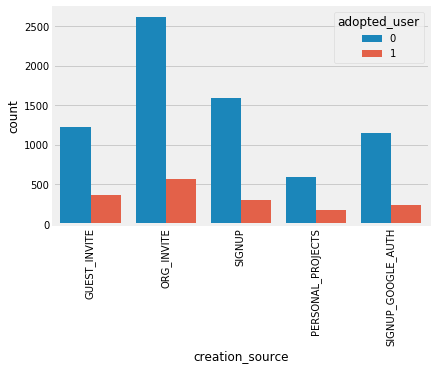

In [23]:
# Creation source and adopted user
_ = sns.countplot(x='creation_source', data=data, hue='adopted_user')
_ = plt.xticks(rotation=90)

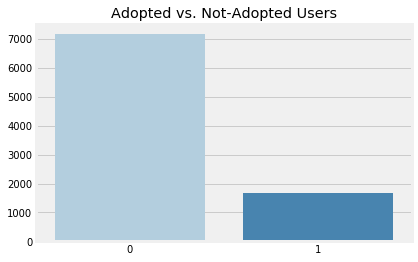

In [24]:
# Take another look at the distribution of the target class
sns.barplot(x = list(data['adopted_user'].value_counts().index), y = data['adopted_user'].value_counts(), palette='Blues')
plt.ylabel('')
plt.title('Adopted vs. Not-Adopted Users');

## 4. Predictive Modeling

First, let us check the dataframe how the structure is. If we have any columns which are categorical, we can convert them to numerical since our models can only work on Numeric data

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 6 columns):
creation_source               8823 non-null object
opted_in_to_mailing_list      8823 non-null int64
enabled_for_marketing_drip    8823 non-null int64
history                       8823 non-null float64
account_age                   8823 non-null int64
adopted_user                  8823 non-null int32
dtypes: float64(1), int32(1), int64(3), object(1)
memory usage: 768.0+ KB


Let us change the column creation_source from categorical to numeric using One hot encoding. In pandas there is a method of get_dummies where it is changed to numerical data.

In [26]:
y = data[['adopted_user']]

In [27]:
X = data.drop(['adopted_user'], axis=1)

In [28]:
# Categorical boolean mask
categorical_feature = X.dtypes==np.object
# filter categorical columns using mask and turn it into a list
categorical_cols = X.columns[categorical_feature].tolist()
categorical_cols

['creation_source']

In [29]:
# Pandas get_dummies 
X_get_dummies = pd.get_dummies(X, columns = categorical_cols, prefix_sep='_', drop_first=True) 
#The drop_first=True drops one column from the resulted dummy features. The purpose is to avoid multicollinearity.

In [30]:
X_get_dummies.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,history,account_age,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
user_id,,,,,,,,
1,1,0,0.0,38,0,0,0,0
2,0,0,136.0,196,1,0,0,0
3,0,0,0.0,437,1,0,0,0
4,0,0,1.0,374,0,0,0,0
5,0,0,5.0,498,0,0,0,0


In [31]:
X= X_get_dummies

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

# split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48, stratify=y)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [34]:
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

names = []
scores = []
for name, model in tqdm(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.10it/s]


  Name     Score
0  KNN  0.952021
1  SVC  0.928221
2   LR  0.963733
3   DT  0.939176
4  GNB  0.954666
5   RF  0.959199
6   GB  0.960710


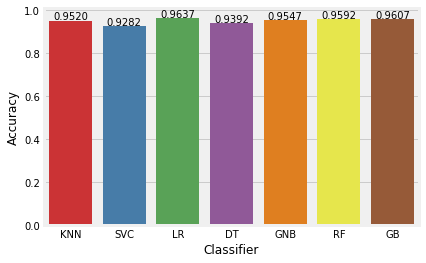

In [35]:
# Visualize model model scores
axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split, palette='Set1')
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

From the above, it looks like Logistic Regression has the highest accuracy. Let us try to tune the parameters and see if we can get a better accuracy and less training and validation loss

In [36]:
clf = GradientBoostingClassifier(verbose=True)
clf.fit(X_train, y_train)
print('Train Score:', round(clf.score(X_train,y_train),3))
print('Test Score:', round(clf.score(X_test,y_test),3))

      Iter       Train Loss   Remaining Time 
         1           0.8072            0.39s
         2           0.7034            0.39s
         3           0.6252            0.39s
         4           0.5626            0.38s
         5           0.5111            0.38s
         6           0.4677            0.37s
         7           0.4304            0.37s
         8           0.3982            0.38s
         9           0.3704            0.37s
        10           0.3462            0.37s
        20           0.2162            0.27s
        30           0.1750            0.22s
        40           0.1568            0.18s
        50           0.1491            0.14s
        60           0.1441            0.11s
        70           0.1402            0.08s
        80           0.1369            0.05s
        90           0.1337            0.03s
       100           0.1307            0.00s
Train Score: 0.972
Test Score: 0.961


In [37]:
y_pred = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred))
print('Classification report:\n',classification_report(y_test,y_pred))

Accuracy: 0.960710238005289
Confusion matrix:
 [[2101   49]
 [  55  442]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2150
           1       0.90      0.89      0.89       497

    accuracy                           0.96      2647
   macro avg       0.94      0.93      0.94      2647
weighted avg       0.96      0.96      0.96      2647



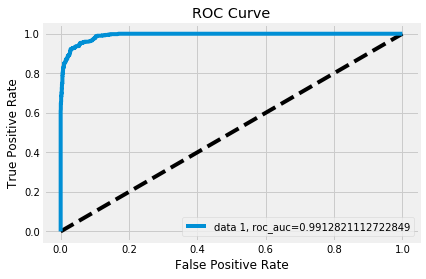

In [38]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="data 1, roc_auc="+str(roc_auc))
plt.legend(loc=4)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [40]:
# extract the numerical values of feature importance from the Random Forest Regressor
importances = clf.feature_importances_

#create a feature list from the original dataset (list of columns)
feature_list = list(X.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df_importance = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df_importance['importance'])
feature= list(df_importance['feature'])

#see df
print(df_importance)

   importance                             feature
0    0.978805                             history
1    0.018978                         account_age
2    0.001135          enabled_for_marketing_drip
3    0.000319  creation_source_SIGNUP_GOOGLE_AUTH
4    0.000250   creation_source_PERSONAL_PROJECTS
5    0.000203          creation_source_ORG_INVITE
6    0.000183            opted_in_to_mailing_list
7    0.000128              creation_source_SIGNUP


Text(0, 0.5, 'Features')

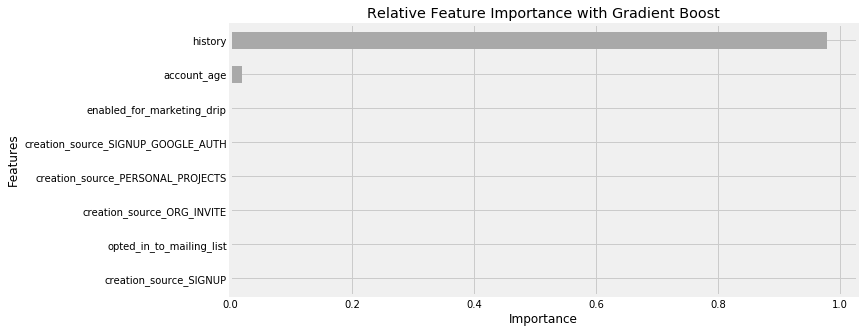

In [42]:
# plot the important features
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(15).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,5))
plt.title('Relative Feature Importance with Gradient Boost')
plt.xlabel('Importance')
plt.ylabel('Features')

As we can see, history of a user's account is very important feature. So I would recommend to spend time making the old users keep on signing in into the application/product, since they already have accounts with it, and try to spend more time by enhancing few other things